<a href="https://colab.research.google.com/github/SukanyaPathak2904/Fruits_Detection/blob/main/fruits_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

In [ ]:
img_train =  "/content/drive/MyDrive/Colab Notebooks/Fruitsmodel/training_new"
img_val =  "/content/drive/MyDrive/Colab Notebooks/Fruitsmodel/test_new"
img_test = "/content/drive/MyDrive/Colab Notebooks/Fruitsmodel/valid_new"

In [ ]:
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Flatten,Lambda,Input
from keras.models import Sequential
from glob import glob
from keras.models import Model
from keras.applications import mobilenet_v2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from keras.preprocessing.image_dataset import image_dataset_from_directory
from keras import preprocessing
import tensorflow as tf
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [ ]:
batch_size= 32
image_height= 62
image_width = 62

In [ ]:
train_ds = keras.preprocessing.image_dataset_from_directory(img_train, seed= 123, image_size=(image_height,image_width), batch_size= batch_size)

Found 4449 files belonging to 28 classes.


In [ ]:
val_ds= keras.preprocessing.image_dataset_from_directory(img_val, seed= 123, image_size=(image_height,image_width), batch_size= batch_size)

Found 2734 files belonging to 28 classes.


In [ ]:
test_ds = keras.preprocessing.image_dataset_from_directory(img_test,batch_size= batch_size,image_size=(image_width, image_height), seed = 123)

Found 483 files belonging to 28 classes.


In [ ]:
classnames= train_ds.class_names

In [ ]:
classnames

['Apple Braeburn',
 'Apricot',
 'Avocado',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Mandarine',
 'Mango',
 'Mango Red',
 'Nectarine',
 'Nectarine Flat']

In [ ]:
base_model= keras.applications.MobileNetV2(input_shape=(image_width, image_height, 3),
                                            include_top=False,
                                            weights='imagenet')
base_model.trainable = False

In [ ]:
data_augmentation= keras.models.Sequential([
keras.layers.RandomFlip('horizontal'),
keras.layers.RandomRotation(0.2) ])


In [ ]:
num_class= len(classnames)

In [ ]:
num_class

28

In [ ]:
inputs = keras.Input(shape= (image_width, image_height, 3))
#x= data_augmentation(inputs)
x= keras.applications.mobilenet_v2.preprocess_input(inputs)
x= base_model(x, training= False)
x= keras.layers.GlobalAveragePooling2D()(x)
x= keras.layers.Dropout(0.2)(x)
#x= keras.layers.Dense(64, activation ='relu')(x)
#x = keras.layers.Dropout(0.2)(x)

outputs= keras.layers.Dense(num_class, activation = 'softmax')(x)
model = keras.Model(inputs, outputs)

In [ ]:
inputs

<KerasTensor: shape=(None, 62, 62, 3) dtype=float32 (created by layer 'input_3')>

In [ ]:
output = keras.layers.Dense(num_class,activation= 'softmax')(x)
model = keras.Model(inputs, output)

In [ ]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
initial_epochs = 5
early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
history  = model.fit(train_ds,validation_data = test_ds, epochs= initial_epochs, callbacks= [early_stop])

Epoch 1/5
140/140 [==============================] - 26s 160ms/step - loss: 0.5892 - accuracy: 0.8660 - val_loss: 0.6232 - val_accuracy: 0.7971
Epoch 2/5
140/140 [==============================] - 24s 166ms/step - loss: 0.0254 - accuracy: 0.9955 - val_loss: 0.6042 - val_accuracy: 0.8199
Epoch 3/5
140/140 [==============================] - 23s 161ms/step - loss: 0.0100 - accuracy: 0.9991 - val_loss: 0.5735 - val_accuracy: 0.8282
Epoch 4/5
140/140 [==============================] - 23s 159ms/step - loss: 0.0088 - accuracy: 0.9989 - val_loss: 0.5643 - val_accuracy: 0.8447
Epoch 5/5
140/140 [==============================] - 22s 154ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.5719 - val_accuracy: 0.8468


In [ ]:
print(len(base_model.layers))

154


In [ ]:
initial_epochs = len(history.history['accuracy'])
initial_epochs

5

In [ ]:
base_model.trainable = True

# len(base_model.layers) -> 154 layers in base_model
# Fine-tune from this layer onwards
fine_tune_at = 110

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

In [ ]:
base_learning_rate = 0.0001
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=base_learning_rate/10),# use low LR to avoid overfit
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 62, 62, 3)]       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 62, 62, 3)        0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 62, 62, 3)        0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                    

In [ ]:
#fine_tune_epochs = 1
#total_epochs = initial_epochs + fine_tune_epochs

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

history_fine = model.fit(train_ds,
                         epochs=1,
                        validation_data= val_ds,
                         callbacks=[early_stop])

140/140 [==============================] - 36s 235ms/step - loss: 0.0048 - accuracy: 0.9996 - val_loss: 0.3416 - val_accuracy: 0.9148


In [ ]:
history_fine = model.fit(train_ds,
                         epochs=2,
                         initial_epoch=history.epoch[-1],
                         validation_data= val_ds,
                         callbacks=[early_stop])

In [ ]:
plt.plot(history_fine['accuracy'], label='train acc')
plt.plot(history_fine['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_ds)

16/16 [==============================] - 2s 118ms/step - loss: 0.5625 - accuracy: 0.8468


[0.5624540448188782, 0.8467909097671509]

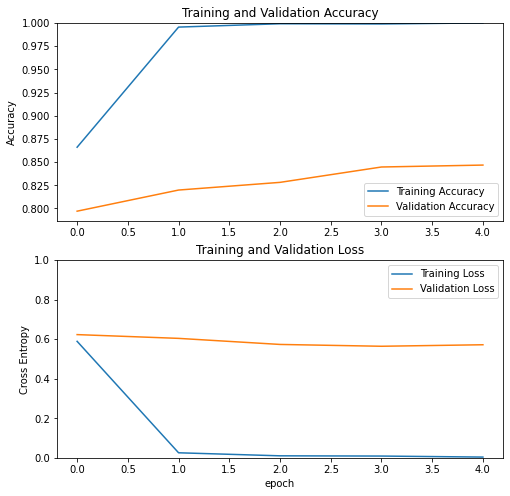

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
import tensorflow as tf
from keras.models import load_model
model.save('fruitsmodel_mobilenet.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
checkk = load_model('fruitsmodel_mobilenet.h5')
new_img = "/content/Untitled Folder"
option.

In [ ]:
check.option(fruitsmodel_mobilenet.h5)

In [ ]:
from matplotlib.rcsetup import validate_font_properties
sgvv_ghe = jjfcd.gjjderc(gdbbvhuty)
vbbnx=  dffuif+vghtyf
validate_font_properties()
